# The Truth Seeker

A story in three simulations about bias, evidence, and belief.

---

## Motivation

In a world full of noisy data, how do we find the truth?

This project explores three classic Bayesian dilemmas:

1. **Simulation 1** – _How Much Evidence Do You Need?_  
   A coin is flipped over and over. Can you find the true bias?

2. **Simulation 2** – _How Sure Should You Be?_  
   A medical test comes back positive. But how likely is it that the patient really has the disease?

3. **Simulation 3** – _How Wrong Are You?_  
   A suspect is identified in a lineup. Do you trust the witness or your own prior beliefs?

Each simulation explores the tension between **prior assumptions and new data**, showing how our beliefs update (or fail to).

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display, Markdown

## Simulation 1: How Much Evidence Do You Need?

You're trying to figure out whether a coin is fair.

But you're not starting from scratch — you already have a belief about its bias.

- What if you think it's a fair coin?
- What if you suspect it's heavily weighted toward tails?
- And what happens when the coin starts coming up heads again and again?

Use the sliders to set your prior belief about the coin's fairness and the number of observed flips.

Then see how your belief updates as more evidence comes in.

How many flips does it take before you're convinced?

In [2]:
# Simulation
true_p = 0.7

# Flip 50 times
np.random.seed(42)
flips = np.random.binomial(1, true_p, size=50)

# Count outcomes
heads = np.cumsum(flips)
tails = np.cumsum(1 - flips)

In [3]:
def plot_belief(prior_a, prior_b, flips, step, color):
    h = np.sum(flips[:step])
    t = step - h
    x = np.linspace(0, 1, 500)
    posterior = beta(prior_a + h, prior_b + t)
    plt.plot(x, posterior.pdf(x), label=f'After {step} flips', color=color)

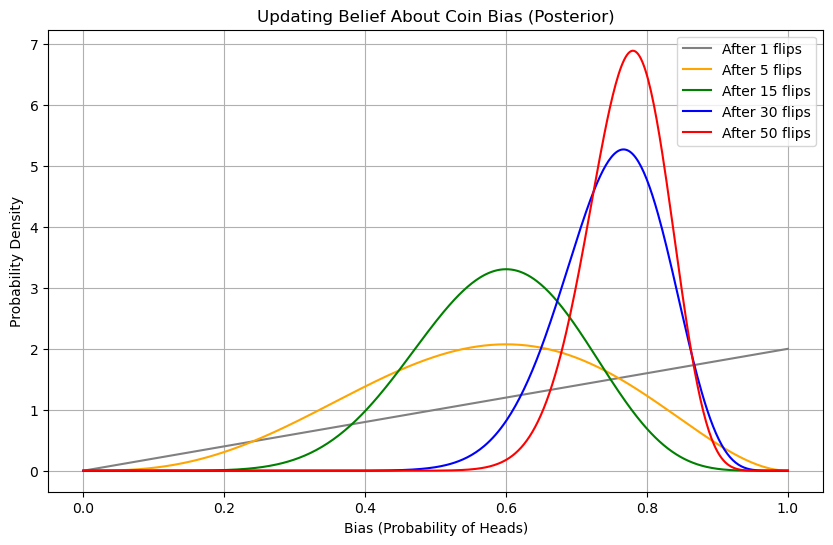

In [4]:
# Prior Set up
prior_a, prior_b = 1, 1  # Uniform prior

plt.figure(figsize=(10, 6))

# Belief updates at various stages
plot_belief(prior_a, prior_b, flips, 1, 'gray')
plot_belief(prior_a, prior_b, flips, 5, 'orange')
plot_belief(prior_a, prior_b, flips, 15, 'green')
plot_belief(prior_a, prior_b, flips, 30, 'blue')
plot_belief(prior_a, prior_b, flips, 50, 'red')

plt.title("Updating Belief About Coin Bias (Posterior)")
plt.xlabel("Bias (Probability of Heads)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

## Simulation 1B: When Strong Priors Trap You

Sometimes, our prior beliefs are so strong that we ignore the evidence.

Imagine a scientist who refuses to believe the coin is unfair. They start with a prior that the coin is almost certainly fair. But in reality, the coin is biased (80% chance of heads).

Let’s see how long it takes their belief to shift and whether it ever does.

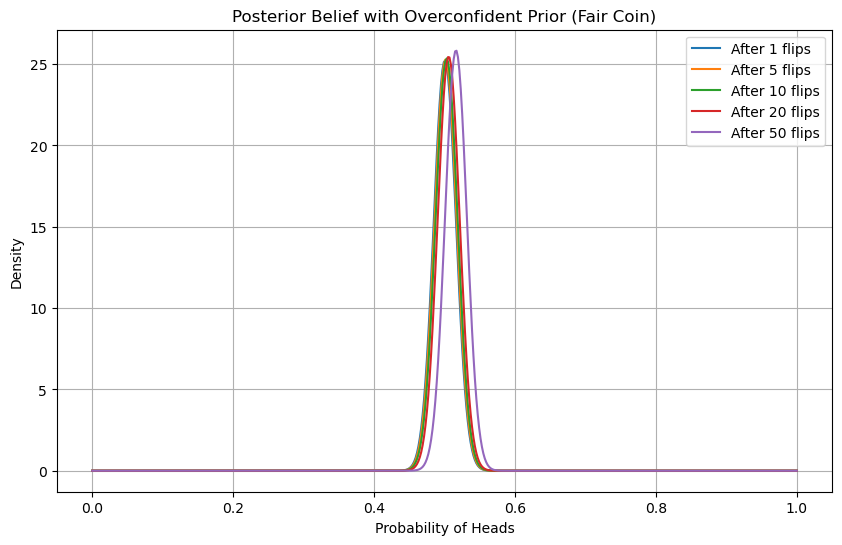

In [5]:
# Simulate a biased coin: 80% heads, 20% tails
np.random.seed(42)
n_flips = 50
p_heads_actual = 0.8
flips = np.random.choice([1, 0], size=n_flips, p=[p_heads_actual, 1 - p_heads_actual])

# Strong prior: believes coin is 50/50 with extreme confidence
alpha_prior = 500
beta_prior = 500

# Track posterior updates
posterior_alphas = []
posterior_betas = []

for i in range(1, n_flips + 1):
    heads = np.sum(flips[:i])
    tails = i - heads
    posterior_alphas.append(alpha_prior + heads)
    posterior_betas.append(beta_prior + tails)

# Plot posterior after each flip
x = np.linspace(0, 1, 500)
plt.figure(figsize=(10, 6))
for i in [1, 5, 10, 20, 50]:
    posterior = beta(posterior_alphas[i-1], posterior_betas[i-1])
    plt.plot(x, posterior.pdf(x), label=f'After {i} flips')

plt.title("Posterior Belief with Overconfident Prior (Fair Coin)")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### Insights

Despite flipping the coin 50 times and getting mostly heads, the posterior still clusters around 0.5. This is because the prior belief was extremely confident the coin is fair. It takes a lot of evidence to overcome that.

This is the danger of overconfident priors: they can delay or distort learning, even when reality is trying to tell you otherwise.

## Simulation 1C: Tuning Our Own Prior

By changing the sliders below we're adjusting how confident the person is before seeing any coin flips.

- A small prior (e.g., Alpha=1, Beta=1) means you're flexible.
- A big prior (e.g., Alpha=50, Beta=50) means you're confident the coin is fair.

This shows how Bayesian inference works in action and how much influence our starting belief really has.

In [6]:
def interactive_coin_simulation(alpha_prior, beta_prior, n_flips):
    # Simulate biased coin (80% heads)
    np.random.seed(42)
    p_heads_actual = 0.8
    flips = np.random.choice([1, 0], size=n_flips, p=[p_heads_actual, 1 - p_heads_actual])

    heads = np.sum(flips)
    tails = n_flips - heads

    alpha_post = alpha_prior + heads
    beta_post = beta_prior + tails

    x = np.linspace(0, 1, 500)
    posterior = beta(alpha_post, beta_post)

    plt.figure(figsize=(10, 5))
    plt.plot(x, posterior.pdf(x), label=f'Posterior after {n_flips} flips')
    plt.axvline(p_heads_actual, color='red', linestyle='--', label='True Bias (0.8)')
    plt.title(f"Posterior Belief\nPrior: Beta({alpha_prior}, {beta_prior}), Flips: {n_flips}")
    plt.xlabel("Probability of Heads")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
alpha_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Alpha (heads)')
beta_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Beta (tails)')
flip_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Num Flips')

widgets.interact(interactive_coin_simulation,
                 alpha_prior=alpha_slider,
                 beta_prior=beta_slider,
                 n_flips=flip_slider)

interactive(children=(IntSlider(value=1, description='Alpha (heads)', min=1), IntSlider(value=1, description='…

<function __main__.interactive_coin_simulation(alpha_prior, beta_prior, n_flips)>

## Simulation 2: How Sure Should You Be?

A medical test just came back positive.

But does that mean the patient really has the disease?

- The disease is rare: only 1 in 1,000 people have it.
- The test is highly accurate but not perfect.
- Even a small false positive rate can lead to surprising results.

Use the sliders to set the disease prevalence, test accuracy, and false positive rate.

Then see how Bayes’ Theorem updates your belief after a positive test.

You might be shocked at how low the actual chance of disease still is.

In [8]:
# Parameters
prior = 0.01             # P(Disease)
sensitivity = 0.99       # P(Test + | Disease)
specificity = 0.95       # P(Test - | No Disease)

# Use Bayes' Theorem
# P(Disease | Test +) = (P(Test + | Disease) * P(Disease)) / P(Test +)

# Compute P(Test +)
p_test_positive = (sensitivity * prior) + ((1 - specificity) * (1 - prior))

# Compute posterior
posterior = (sensitivity * prior) / p_test_positive

# Print result
print(f"After a positive test, the probability the patient actually has the disease is: {posterior:.2%}")

After a positive test, the probability the patient actually has the disease is: 16.67%


/opt/miniconda3/envs/truth_seeker/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6986: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bins = np.histogram_bin_edges(
/opt/miniconda3/envs/truth_seeker/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


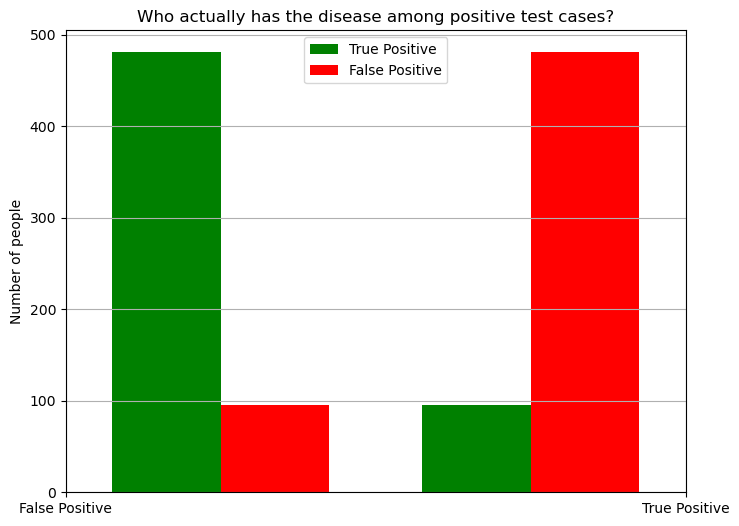

In [9]:
import matplotlib.pyplot as plt
# Simulate 10,000 patients
n = 10000
has_disease = np.random.rand(n) < prior
test_positive = (has_disease & (np.random.rand(n) < sensitivity)) | \
                (~has_disease & (np.random.rand(n) < (1 - specificity)))

# Visualization
plt.figure(figsize=(8, 6))
plt.hist([has_disease[test_positive], ~has_disease[test_positive]],
         label=['True Positive', 'False Positive'],
         color=['green', 'red'],
         bins=2, rwidth=0.7)
plt.xticks([0, 1], ['False Positive', 'True Positive'])
plt.title("Who actually has the disease among positive test cases?")
plt.ylabel("Number of people")
plt.legend()
plt.grid(True)
plt.show()

## Trying It Ourself

We can adjust the parameters below to see how changing the rarity of the disease and test accuracy affects risk.

In [10]:
def bayes_disease_test(prior_disease, sensitivity, specificity):
    # Convert percent to fraction
    p_disease = prior_disease / 100
    p_no_disease = 1 - p_disease
    sens = sensitivity / 100
    spec = specificity / 100

    # Bayes rule: P(Disease | Positive Test)
    p_positive = p_disease * sens + p_no_disease * (1 - spec)
    posterior = (p_disease * sens) / p_positive

    # Bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(["P(Disease | Positive)"], [posterior], color="orange")
    plt.ylim(0, 1)
    plt.title(f"Posterior Probability: {posterior:.2%}")
    plt.ylabel("Probability")
    plt.grid(True, axis='y')
    plt.show()

In [11]:
prior_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Prior %')
sensitivity_slider = widgets.IntSlider(value=99, min=80, max=100, step=1, description='Sensitivity')
specificity_slider = widgets.IntSlider(value=95, min=80, max=100, step=1, description='Specificity')

widgets.interact(bayes_disease_test,
                 prior_disease=prior_slider,
                 sensitivity=sensitivity_slider,
                 specificity=specificity_slider)

interactive(children=(IntSlider(value=1, description='Prior %', min=1), IntSlider(value=99, description='Sensi…

<function __main__.bayes_disease_test(prior_disease, sensitivity, specificity)>

## Simulation 3: How Wrong Are You?

A witness identifies someone in a police lineup.
But how reliable is that identification?

- What if only 1 in 5 people are actually guilty?
- What if witnesses mistakenly identify innocent people 25% of the time?
- What if you strongly believe in their guilt before even seeing the ID?

We can use the sliders below to simulate a real-world dilemma of bias vs evidence.

How likely is it that the suspect is actually guilty?

In [12]:
# Parameters
prior_guilt = 1 / 5           # 1 in 5 people is actually guilty
accuracy_if_guilty = 0.8      # P(ID | Guilty)
false_id_if_innocent = 0.25   # P(ID | Innocent)

# Total probability of ID being made
p_id = (accuracy_if_guilty * prior_guilt) + (false_id_if_innocent * (1 - prior_guilt))

# Bayes' Theorem
posterior = (accuracy_if_guilty * prior_guilt) / p_id

print(f"Probability the suspect is guilty given the ID: {posterior:.2%}")

Probability the suspect is guilty given the ID: 44.44%


In [13]:
def guilt_posterior(prior_percent, witness_accuracy, false_id_rate):
    # Convert to probabilities
    prior = prior_percent / 100
    p_id_given_guilty = witness_accuracy / 100
    p_id_given_innocent = false_id_rate / 100

    # Total probability of ID
    p_id = (p_id_given_guilty * prior) + (p_id_given_innocent * (1 - prior))

    # Bayes' Theorem
    posterior = (p_id_given_guilty * prior) / p_id

    # Visualize
    plt.figure(figsize=(6, 4))
    plt.bar(["P(Guilty | ID)"], [posterior], color='purple')
    plt.ylim(0, 1)
    plt.title(f"Posterior Probability: {posterior:.2%}")
    plt.ylabel("Probability")
    plt.grid(True, axis='y')
    plt.show()

In [14]:
prior_slider = widgets.IntSlider(value=20, min=1, max=100, step=1, description='Prior Guilt %')
accuracy_slider = widgets.IntSlider(value=80, min=50, max=100, step=1, description='Witness Accuracy')
false_id_slider = widgets.IntSlider(value=25, min=0, max=100, step=1, description='False ID Rate')

widgets.interact(guilt_posterior,
                 prior_percent=prior_slider,
                 witness_accuracy=accuracy_slider,
                 false_id_rate=false_id_slider)

interactive(children=(IntSlider(value=20, description='Prior Guilt %', min=1), IntSlider(value=80, description…

<function __main__.guilt_posterior(prior_percent, witness_accuracy, false_id_rate)>